# Visualizations with Merged Dataset

# Necessary Importations

In [1]:
#Necessary Importations
import pandas as pd
import numpy as np
import requests
import io
import os
import seaborn as sns
import matplotlib.pyplot as plt 
import statsmodels.api as sm

# Defined Functions

In [32]:
#Line Plots
def lineplot(df,x_column,y_column,color_var,title,x_title,y_title):
    ax = sns.lineplot(
        data = df,      # Dataframe with long format data
        x = x_column,                   # Column for x-axis (dates)
        y = y_column,         # Column for y-axis (GDP values)
        hue = color_var               # Column for color differentiation (countries)
    )
    ax.set_title(title)
    ax.set_xlabel(x_title)
    ax.set_ylabel(y_title)
    plt.show()

#Grouped Summary Bar Plots 
def group_plot(df,group,column,title):
    plot = df.groupby(group)[column].describe().transpose().drop('count')
    ax = plot.plot(kind = 'barh')
    ax.set_title(title)
    ax.set_xlabel('Value')
    ax.set_ylabel('Statistic')
    plt.show()

def scatter_plot(df, x_col, y_col,title,key):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=x_col, y=y_col, hue=key, data=df)

    try:
        for region in df[key].unique():
            region_df = df[df[key] == region]
            z = np.polyfit(region_df[x_col], region_df[y_col], 1)
            p = np.poly1d(z)
            xp = np.linspace(region_df[x_col].min(), region_df[x_col].max(), 100)
            plt.plot(xp, p(xp), label=f'{region} Line of Best Fit')
    except np.linalg.LinAlgError:
        print("Error: unable to calculate line of best fit")

    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(title)
    plt.legend()
    plt.show()

In [20]:
df = pd.read_csv("../data/processed/second_merged.csv")
df = df.set_index(['code','year'])

df.head()

Food supply quantity (kg/capita/yr)_Cereals - Excluding Beer  \
code year                                                                 
BGD  2011                                             278.27              
     2012                                             278.22              
     2013                                             273.69              
     2014                                             272.78              
     2015                                             278.61              

           Food supply quantity (kg/capita/yr)_Starchy Roots  rolling_std  \
code year                                                                   
BGD  2011                                              47.40    46.219922   
     2012                                              48.06    45.756559   
     2013                                              48.70    36.231714   
     2014                                              49.29     2.619036   
     2015                                              50.07     2.833060   

           Rural Access to Electricity(Percent of Population)  \
code year                                                       
BGD  2011                                               45.7    
     2012                                               53.8    
     2013                                               48.6    
     2014                                               48.1    
     2015                                               63.8    

           Mobile Cellular Subscriptions (per 100 people)  \
code year                                                   
BGD  2011                                       56.166790   
     2012                                       63.896104   
     2013                                       75.669007   
     2014                                       81.344598   
     2015                                       83.238753   

           Fixed Broadband Subsciptions (per 100 people) region  \
code year                                                         
BGD  2011                                       0.305031     SA   
     2012                                       0.387219     SA   
     2013                                       0.974448     SA   
     2014                                       1.958140     SA   
     2015                                       3.069920     SA   

           Agriculture, forestry, and fishing, value added (percent of GDP)  \
code year                                                                     
BGD  2011                                          16.809987                  
     2012                                          16.177563                  
     2013                                          15.493278                  
     2014                                          15.351621                  
     2015                                          14.782996                  

           Crop production index (2014-2016 = 100)  Account (% age 15+)  ...  \
code year                                                                ...   
BGD  2011                                    93.78            31.740000  ...   
     2012                                    94.27            31.490000  ...   
     2013                                    96.58            31.240000  ...   
     2014                                    98.76            30.990000  ...   
     2015                                   100.69            37.343333  ...   

           Fertility rate, total (births per woman)  \
code year                                             
BGD  2011                                     2.309   
     2012                                     2.263   
     2013                                     2.247   
     2014                                     2.228   
     2015                                     2.227   

           GDP per capita, PPP (constant 2021 international $)  \
code year               

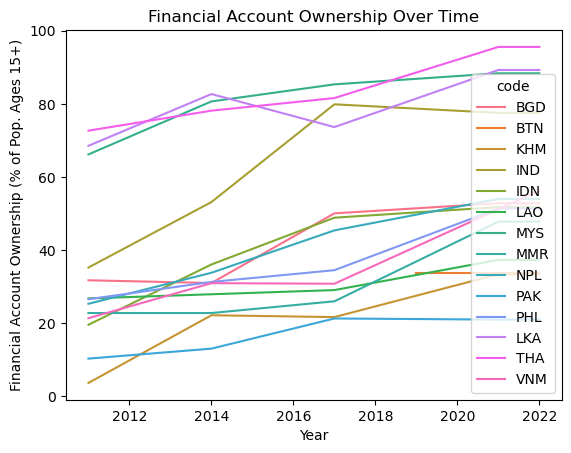

In [21]:
lineplot(
    df,
    'year',
    'Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+)',
    'code',
    "Financial Account Ownership Over Time",
    "Year",
    "Financial Account Ownership (% of Pop. Ages 15+)")

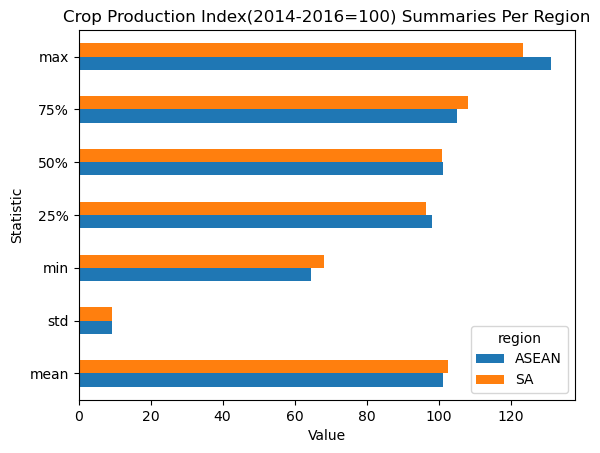

In [28]:
group_plot(df,'region','Crop production index (2014-2016 = 100)','Crop Production Index(2014-2016=100) Summaries Per Region')

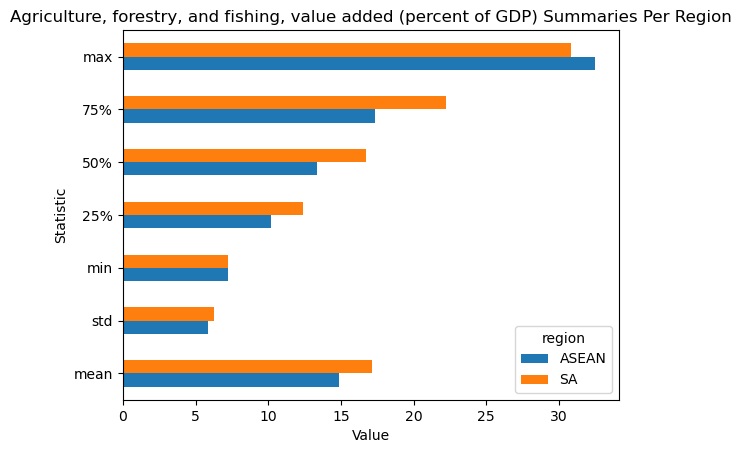

In [29]:
group_plot(df,'region','Agriculture, forestry, and fishing, value added (percent of GDP)','Agriculture, forestry, and fishing, value added (percent of GDP) Summaries Per Region')

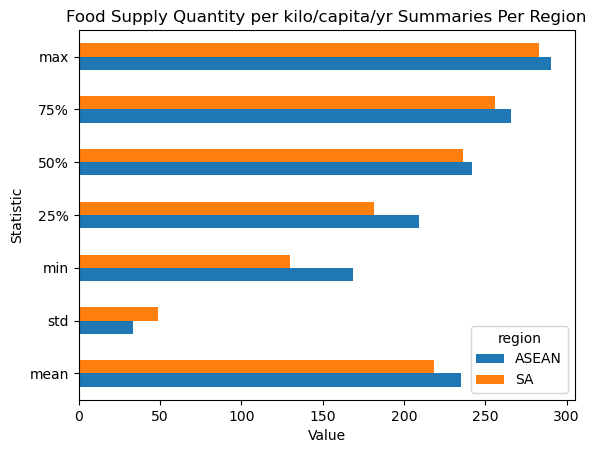

In [30]:
group_plot(df,'region','Food supply quantity (kg/capita/yr)_Cereals - Excluding Beer','Food Supply Quantity per kilo/capita/yr Summaries Per Region')

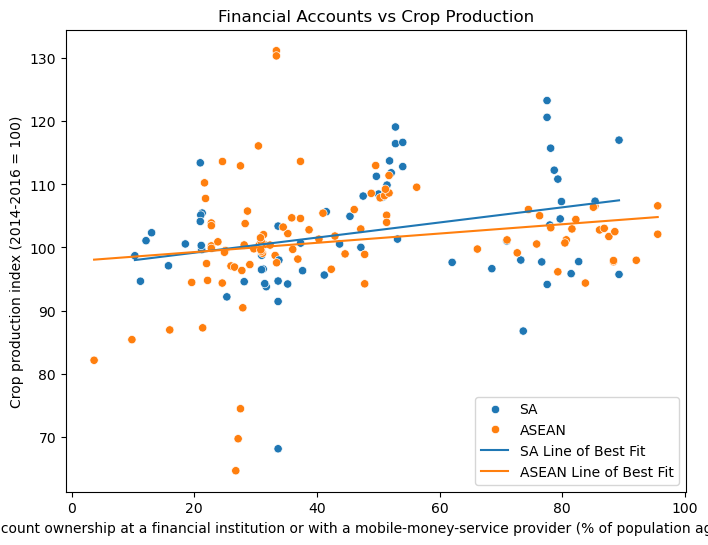

In [33]:
scatter_plot(df,'Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+)','Crop production index (2014-2016 = 100)','Financial Accounts vs Crop Production','region')

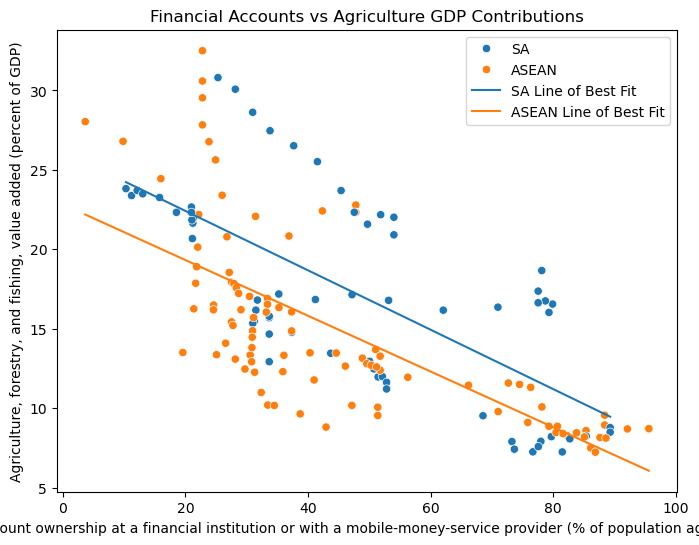

In [34]:
scatter_plot(df,'Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+)','Agriculture, forestry, and fishing, value added (percent of GDP)','Financial Accounts vs Agriculture GDP Contributions','region')

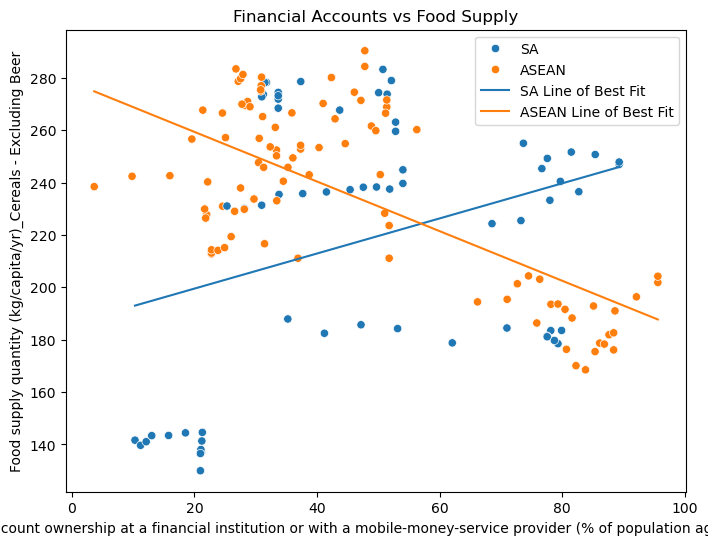

In [35]:
scatter_plot(df,'Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+)','Food supply quantity (kg/capita/yr)_Cereals - Excluding Beer','Financial Accounts vs Food Supply','region')